# Predicting Group Membership of a New Customer based on Demographic Data provided by a Telecommunications Provider using kNN Classifier 

### Importing Required Libraries

In [1]:
%matplotlib notebook
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Loading Data from CSV File

In [2]:
df = pd.read_csv(r'C:\Users\user\Desktop\Data Science\teleCust1000t.csv')
df.head()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3


### Mapping Function

In [3]:
services = ('Basic', 'Total', 'Plus', 'E')
map = dict(zip(df.custcat.unique(), services))
map

{1: 'Basic', 4: 'Total', 3: 'Plus', 2: 'E'}

### Data Visualization

<IPython.core.display.Javascript object>


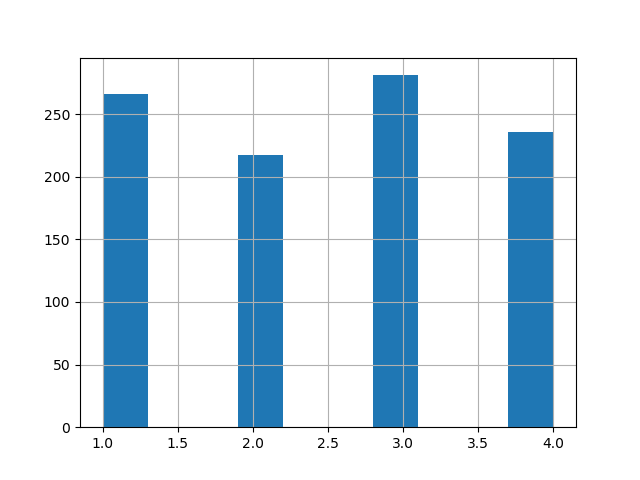

In [4]:
df.custcat.hist()

<IPython.core.display.Javascript object>


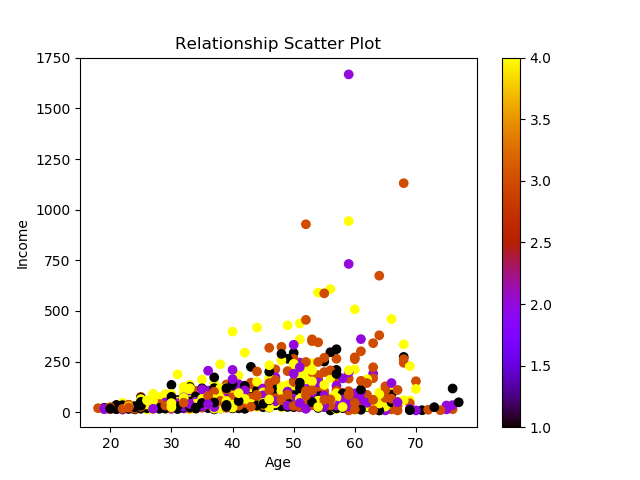

In [5]:
from matplotlib import cm
cmap = cm.get_cmap('gnuplot')
plt.figure()
plt.scatter(df.age, df.income, c = df.custcat, cmap = cmap)
plt.xlabel('Age')
plt.ylabel('Income')
plt.title('Relationship Scatter Plot')
plt.colorbar()

### Splitting Data into Train and Test

In [6]:
from sklearn.model_selection import train_test_split
X = df[['age', 'income']]
y = df['custcat']
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state = 0)

### kNN Classifier

#### Choosing the Best k

<IPython.core.display.Javascript object>


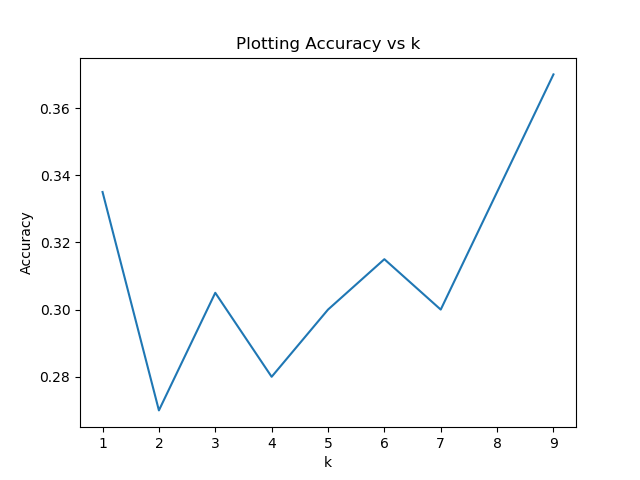

Text(0.5, 1.0, 'Plotting Accuracy vs k')

In [7]:
from sklearn.neighbors import KNeighborsClassifier
k = range(1,10)
scores = []
for item in k:
    kNN = KNeighborsClassifier(n_neighbors = item)
    kNN.fit(X_train, y_train)
    scores.append(kNN.score(X_test, y_test))
plt.figure()
plt.plot(k, scores)
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.title('Plotting Accuracy vs k')

#### Classifier Model with k = 9

In [8]:
kNN = KNeighborsClassifier(n_neighbors = 9)
kNN.fit(X_train, y_train)
kNN

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=9, p=2,
                     weights='uniform')

### Model Accuracy

In [9]:
kNN.score(X_test, y_test)

0.37

### Predicting the New Customer Group Membership

In [10]:
new = kNN.predict([[35, 190.5]])
map[new[0]]

'Plus'

### Evaluation Metrics

In [11]:
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
y_test_hat = kNN.predict(X_test)
print("Confusion Matrix : ")
print(confusion_matrix(y_test, y_test_hat))
print("F1 score = ", f1_score(y_test, y_test_hat, average = 'weighted'))

Confusion Matrix : 
[[29  9 16  7]
 [12 11 19  2]
 [12  5 25  8]
 [16  6 14  9]]
F1 score =  0.3584589615442864
